In [1]:
# Common imports
import numpy as np
import os
from backend import import_excel, export_excel

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
# style.use('bmh')
from mpl_toolkits.mplot3d import Axes3D
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import pandas as pd
import seaborn as sns

import tensorflow as tf
import keras
import tensorflow as tf
from keras import Input, Model
from keras.models import Sequential, Model


import random

import sys
sys.path.append("..")

import dataset,network_ReLU

# Load Data

In [2]:
# Preprocessing

scenario= "sinus" #sinus, helix
n_instance = 1000
n_features = 2
Z=4
scales = ['-1-1','0-1']
scaled = '-1-1'
nodes=8

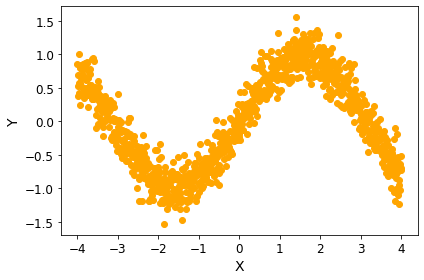

In [3]:
if scenario in ("3d", "helix"):
    X_train, y_train, X_test, y_test, X_valid, y_valid = dataset.get_dataset(n_instance, scenario)
    print("X_train= x,y",X_train.shape)
    print("y_train= z",y_train.shape)

    ax = plt.subplot(projection='3d')
    ax.scatter(X_train[:,0], X_train[:,1], y_train, c='orange')
    ax.set_zlabel('Z')
    ax.set_ylabel('Y')
    ax.set_xlabel('X')
    plt.tight_layout()

    
else:
    X_train, y_train, X_test, y_test, X_valid, y_valid = dataset.get_dataset(n_instance, scenario)
    plt.scatter(X_train,y_train, c='orange', label='Sample Data')
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.tight_layout()

In [4]:
#storage data
os.system('mkdir Dataset')
os.system('mkdir AAE')
os.system('mkdir AAE/Models')
os.system('mkdir AAE/Losses')
os.system('mkdir AAE/Random_test')
#export_excel(X_train, 'Dataset/X_train')
#export_excel(y_train, 'Dataset/y_train')

# print(X_train.shape,y_train.shape)
X_train = import_excel('Dataset/X_train')
y_train = import_excel('Dataset/y_train')
print('made dataset')

made dataset


# AAE

### Architecture

In [5]:
encoder=network_ReLU.build_encoder(Z, nodes, n_features)
#print("Encoder:\n")
#encoder.summary()


decoder=network_ReLU.build_decoder(Z,nodes, n_features)
#print("Decoder:\n")
#decoder.summary()

discriminator=network_ReLU.build_discriminator(Z)
#print("Discriminator:\n")
#discriminator.summary()

### Preprocessing

In [6]:
import AAE_Model_ReLU

GANorWGAN='WGAN'
epochs =2000
BATCH_SIZE = 100
n_dis=1
n_endis=0
n_decoder=4
#n_autoencoder=1

In [7]:
aae = AAE_Model_ReLU.AAE(Z, n_features, BATCH_SIZE,GANorWGAN,nodes,n_dis,n_decoder)

In [8]:
train_dataset, scaler, X_train_scaled = aae.preproc(X_train, y_train, scaled)

print("X_train",X_train.shape)
print("y_train",y_train.shape)
print("X_train_scaled",X_train_scaled.shape)


data shape_1 (100, 2)
data shape_2 (100, 2)
data shape_3 (100, 2)
data shape_4 (100, 2)
data shape_5 (100, 2)
data shape_6 (100, 2)
data shape_7 (100, 2)
data shape_8 (100, 2)
data shape_9 (100, 2)
data shape_10 (100, 2)
Cycles:  10
X_train (1000, 1)
y_train (1000, 1)
X_train_scaled (1000, 2)


## Training

In [9]:
hist = aae.train(Z,BATCH_SIZE,train_dataset, epochs, scaler, scaled,X_train_scaled)
#Dropout0.8+delete Flatten, epoch=2000好  
#0126Dropout0.6+delete Flatten+增加encoder/decoder


#1203LeakyReLU+Flatten
#Change e/d architexture+1203
#試試backend/4


#self.n_critic=10
#n_c=5
#complex dis_network + more n_autoencoder

Epoch 1/2000
[Dis(w): -0.009459], [endis(w)]: 0.580885, [decoder(mse)]: 0.380008]
Epoch 2/2000
[Dis(w): 0.027328], [endis(w)]: 0.408334, [decoder(mse)]: 0.394096]
Epoch 3/2000
[Dis(w): 0.057705], [endis(w)]: 0.772781, [decoder(mse)]: 0.405637]
Epoch 4/2000
[Dis(w): 0.049041], [endis(w)]: 0.489236, [decoder(mse)]: 0.409364]
Epoch 5/2000
[Dis(w): 0.030932], [endis(w)]: 0.625964, [decoder(mse)]: 0.405280]
Epoch 6/2000
[Dis(w): 0.038968], [endis(w)]: 0.476572, [decoder(mse)]: 0.404050]
Epoch 7/2000
[Dis(w): 0.036494], [endis(w)]: 0.686791, [decoder(mse)]: 0.407540]
Epoch 8/2000
[Dis(w): 0.051052], [endis(w)]: 0.717274, [decoder(mse)]: 0.410784]
Epoch 9/2000
[Dis(w): 0.051654], [endis(w)]: 0.796529, [decoder(mse)]: 0.407110]
Epoch 10/2000
[Dis(w): 0.041351], [endis(w)]: 0.599056, [decoder(mse)]: 0.409843]
Epoch 11/2000
[Dis(w): 0.043998], [endis(w)]: 0.685844, [decoder(mse)]: 0.414224]
Epoch 12/2000
[Dis(w): 0.013932], [endis(w)]: 0.610122, [decoder(mse)]: 0.416915]
Epoch 13/2000
[Dis(w): 0

[Dis(w): 0.060417], [endis(w)]: 0.530277, [decoder(mse)]: 0.382674]
Epoch 102/2000
[Dis(w): 0.027321], [endis(w)]: 0.651069, [decoder(mse)]: 0.383794]
Epoch 103/2000
[Dis(w): 0.039220], [endis(w)]: 0.674927, [decoder(mse)]: 0.387144]
Epoch 104/2000
[Dis(w): 0.047843], [endis(w)]: 0.753289, [decoder(mse)]: 0.396667]
Epoch 105/2000
[Dis(w): 0.036958], [endis(w)]: 0.761768, [decoder(mse)]: 0.406610]
Epoch 106/2000
[Dis(w): 0.066266], [endis(w)]: 0.613322, [decoder(mse)]: 0.413732]
Epoch 107/2000
[Dis(w): 0.055367], [endis(w)]: 0.540705, [decoder(mse)]: 0.414985]
Epoch 108/2000
[Dis(w): 0.043915], [endis(w)]: 0.438986, [decoder(mse)]: 0.411362]
Epoch 109/2000
[Dis(w): 0.047708], [endis(w)]: 0.669745, [decoder(mse)]: 0.411816]
Epoch 110/2000
[Dis(w): 0.045251], [endis(w)]: 0.629669, [decoder(mse)]: 0.406478]
Epoch 111/2000
[Dis(w): 0.137940], [endis(w)]: 0.690753, [decoder(mse)]: 0.392684]
Epoch 112/2000
[Dis(w): 0.126192], [endis(w)]: 0.642950, [decoder(mse)]: 0.398157]
Epoch 113/2000
[Dis

[Dis(w): 0.044521], [endis(w)]: 0.644594, [decoder(mse)]: 0.406006]
Epoch 201/2000
[Dis(w): 0.010442], [endis(w)]: 0.528084, [decoder(mse)]: 0.394644]
Epoch 202/2000
[Dis(w): 0.027720], [endis(w)]: 0.613254, [decoder(mse)]: 0.401511]
Epoch 203/2000
[Dis(w): 0.030002], [endis(w)]: 0.526481, [decoder(mse)]: 0.399030]
Epoch 204/2000
[Dis(w): 0.025756], [endis(w)]: 0.603395, [decoder(mse)]: 0.402308]
Epoch 205/2000
[Dis(w): 0.035971], [endis(w)]: 0.629817, [decoder(mse)]: 0.405017]
Epoch 206/2000
[Dis(w): 0.007109], [endis(w)]: 0.609966, [decoder(mse)]: 0.408717]
Epoch 207/2000
[Dis(w): 0.017349], [endis(w)]: 0.394094, [decoder(mse)]: 0.409125]
Epoch 208/2000
[Dis(w): 0.013032], [endis(w)]: 0.371174, [decoder(mse)]: 0.407441]
Epoch 209/2000
[Dis(w): 0.006947], [endis(w)]: 0.554065, [decoder(mse)]: 0.408599]
Epoch 210/2000
[Dis(w): 0.019784], [endis(w)]: 0.380419, [decoder(mse)]: 0.411135]
Epoch 211/2000
[Dis(w): 0.131402], [endis(w)]: 0.674952, [decoder(mse)]: 0.360738]
Epoch 212/2000
[Dis

[Dis(w): 0.078780], [endis(w)]: 0.494406, [decoder(mse)]: 0.401742]
Epoch 300/2000
[Dis(w): 0.061037], [endis(w)]: 0.718422, [decoder(mse)]: 0.408436]
Epoch 301/2000
[Dis(w): 0.107766], [endis(w)]: 0.624125, [decoder(mse)]: 0.416008]
Epoch 302/2000
[Dis(w): 0.086191], [endis(w)]: 0.690099, [decoder(mse)]: 0.426298]
Epoch 303/2000
[Dis(w): 0.056512], [endis(w)]: 0.535212, [decoder(mse)]: 0.405375]
Epoch 304/2000
[Dis(w): 0.016471], [endis(w)]: 0.689295, [decoder(mse)]: 0.400435]
Epoch 305/2000
[Dis(w): 0.025896], [endis(w)]: 0.608652, [decoder(mse)]: 0.405182]
Epoch 306/2000
[Dis(w): 0.038718], [endis(w)]: 0.881632, [decoder(mse)]: 0.406904]
Epoch 307/2000
[Dis(w): 0.037224], [endis(w)]: 0.595866, [decoder(mse)]: 0.407701]
Epoch 308/2000
[Dis(w): 0.053890], [endis(w)]: 0.571248, [decoder(mse)]: 0.410207]
Epoch 309/2000
[Dis(w): 0.053818], [endis(w)]: 0.544227, [decoder(mse)]: 0.414882]
Epoch 310/2000
[Dis(w): 0.048812], [endis(w)]: 0.629302, [decoder(mse)]: 0.410915]
Epoch 311/2000
[Dis

[Dis(w): 0.056035], [endis(w)]: 0.719707, [decoder(mse)]: 0.416258]
Epoch 399/2000
[Dis(w): 0.040244], [endis(w)]: 0.407428, [decoder(mse)]: 0.412844]
Epoch 400/2000
[Dis(w): 0.044904], [endis(w)]: 0.457803, [decoder(mse)]: 0.410312]
Epoch 401/2000
[Dis(w): 0.141595], [endis(w)]: 0.447073, [decoder(mse)]: 0.386806]
Epoch 402/2000
[Dis(w): -0.003968], [endis(w)]: 0.726764, [decoder(mse)]: 0.409020]
Epoch 403/2000
[Dis(w): -0.007788], [endis(w)]: 0.639911, [decoder(mse)]: 0.410427]
Epoch 404/2000
[Dis(w): -0.006761], [endis(w)]: 0.474937, [decoder(mse)]: 0.413072]
Epoch 405/2000
[Dis(w): 0.024341], [endis(w)]: 0.523409, [decoder(mse)]: 0.411021]
Epoch 406/2000
[Dis(w): 0.009013], [endis(w)]: 0.775219, [decoder(mse)]: 0.416692]
Epoch 407/2000
[Dis(w): 0.017392], [endis(w)]: 0.763575, [decoder(mse)]: 0.413924]
Epoch 408/2000
[Dis(w): 0.014829], [endis(w)]: 0.399180, [decoder(mse)]: 0.412881]
Epoch 409/2000
[Dis(w): 0.009508], [endis(w)]: 0.580520, [decoder(mse)]: 0.410532]
Epoch 410/2000
[

[Dis(w): -0.007198], [endis(w)]: 0.454929, [decoder(mse)]: 0.410478]
Epoch 498/2000
[Dis(w): 0.003522], [endis(w)]: 0.541941, [decoder(mse)]: 0.407679]
Epoch 499/2000
[Dis(w): 0.004016], [endis(w)]: 0.641162, [decoder(mse)]: 0.410791]
Epoch 500/2000
[Dis(w): 0.001694], [endis(w)]: 0.648004, [decoder(mse)]: 0.411024]
Epoch 501/2000
[Dis(w): 0.020644], [endis(w)]: 0.764905, [decoder(mse)]: 0.397121]
Epoch 502/2000
[Dis(w): -0.002018], [endis(w)]: 0.488434, [decoder(mse)]: 0.413084]
Epoch 503/2000
[Dis(w): -0.010770], [endis(w)]: 0.560046, [decoder(mse)]: 0.419563]
Epoch 504/2000
[Dis(w): -0.004101], [endis(w)]: 0.483287, [decoder(mse)]: 0.414826]
Epoch 505/2000
[Dis(w): -0.002699], [endis(w)]: 0.517001, [decoder(mse)]: 0.412360]
Epoch 506/2000
[Dis(w): -0.003837], [endis(w)]: 0.621970, [decoder(mse)]: 0.413834]
Epoch 507/2000
[Dis(w): -0.003743], [endis(w)]: 0.674140, [decoder(mse)]: 0.412654]
Epoch 508/2000
[Dis(w): -0.010294], [endis(w)]: 0.631327, [decoder(mse)]: 0.410238]
Epoch 509/2

[Dis(w): -0.025549], [endis(w)]: 0.872926, [decoder(mse)]: 0.400892]
Epoch 596/2000
[Dis(w): -0.034355], [endis(w)]: 0.536381, [decoder(mse)]: 0.396003]
Epoch 597/2000
[Dis(w): -0.027483], [endis(w)]: 0.814436, [decoder(mse)]: 0.394840]
Epoch 598/2000
[Dis(w): -0.034319], [endis(w)]: 0.789480, [decoder(mse)]: 0.402186]
Epoch 599/2000
[Dis(w): -0.026197], [endis(w)]: 0.674213, [decoder(mse)]: 0.403407]
Epoch 600/2000
[Dis(w): -0.016582], [endis(w)]: 0.729294, [decoder(mse)]: 0.410629]
Epoch 601/2000
[Dis(w): 0.148049], [endis(w)]: 0.596422, [decoder(mse)]: 0.374107]
Epoch 602/2000
[Dis(w): 0.110684], [endis(w)]: 0.822313, [decoder(mse)]: 0.407959]
Epoch 603/2000
[Dis(w): 0.053116], [endis(w)]: 0.559277, [decoder(mse)]: 0.410866]
Epoch 604/2000
[Dis(w): 0.041814], [endis(w)]: 0.452505, [decoder(mse)]: 0.405885]
Epoch 605/2000
[Dis(w): 0.019868], [endis(w)]: 0.601240, [decoder(mse)]: 0.410682]
Epoch 606/2000
[Dis(w): 0.019223], [endis(w)]: 0.610657, [decoder(mse)]: 0.409201]
Epoch 607/200

[Dis(w): -0.105758], [endis(w)]: 0.716929, [decoder(mse)]: 0.407391]
Epoch 694/2000
[Dis(w): -0.096483], [endis(w)]: 0.473450, [decoder(mse)]: 0.413789]
Epoch 695/2000
[Dis(w): -0.109461], [endis(w)]: 0.480119, [decoder(mse)]: 0.408148]
Epoch 696/2000
[Dis(w): -0.091531], [endis(w)]: 0.664660, [decoder(mse)]: 0.406134]
Epoch 697/2000
[Dis(w): -0.087532], [endis(w)]: 0.460104, [decoder(mse)]: 0.403510]
Epoch 698/2000
[Dis(w): -0.103190], [endis(w)]: 0.534607, [decoder(mse)]: 0.403392]
Epoch 699/2000
[Dis(w): -0.105699], [endis(w)]: 0.446540, [decoder(mse)]: 0.403580]
Epoch 700/2000
[Dis(w): -0.105088], [endis(w)]: 0.579672, [decoder(mse)]: 0.403193]
Epoch 701/2000
[Dis(w): 0.011876], [endis(w)]: 0.647727, [decoder(mse)]: 0.398530]
Epoch 702/2000
[Dis(w): -0.065187], [endis(w)]: 0.637048, [decoder(mse)]: 0.415507]
Epoch 703/2000
[Dis(w): -0.004877], [endis(w)]: 0.602088, [decoder(mse)]: 0.400974]
Epoch 704/2000
[Dis(w): -0.019734], [endis(w)]: 0.496559, [decoder(mse)]: 0.407290]
Epoch 70

[Dis(w): -0.048339], [endis(w)]: 0.518516, [decoder(mse)]: 0.434214]
Epoch 792/2000
[Dis(w): -0.038036], [endis(w)]: 0.605111, [decoder(mse)]: 0.409781]
Epoch 793/2000
[Dis(w): -0.091319], [endis(w)]: 0.228618, [decoder(mse)]: 0.414461]
Epoch 794/2000
[Dis(w): -0.098535], [endis(w)]: 0.491345, [decoder(mse)]: 0.420145]
Epoch 795/2000
[Dis(w): -0.075664], [endis(w)]: 0.774454, [decoder(mse)]: 0.409119]
Epoch 796/2000
[Dis(w): -0.032746], [endis(w)]: 0.732554, [decoder(mse)]: 0.405975]
Epoch 797/2000
[Dis(w): -0.007526], [endis(w)]: 0.448167, [decoder(mse)]: 0.402377]
Epoch 798/2000
[Dis(w): -0.010596], [endis(w)]: 0.637294, [decoder(mse)]: 0.402202]
Epoch 799/2000
[Dis(w): -0.010774], [endis(w)]: 0.624858, [decoder(mse)]: 0.404416]
Epoch 800/2000
[Dis(w): -0.007625], [endis(w)]: 0.619907, [decoder(mse)]: 0.409801]
Epoch 801/2000
[Dis(w): 0.070517], [endis(w)]: 0.602549, [decoder(mse)]: 0.397792]
Epoch 802/2000
[Dis(w): -0.004767], [endis(w)]: 0.567035, [decoder(mse)]: 0.416527]
Epoch 80

[Dis(w): -0.075128], [endis(w)]: 0.627676, [decoder(mse)]: 0.400852]
Epoch 890/2000
[Dis(w): -0.071623], [endis(w)]: 0.644658, [decoder(mse)]: 0.403893]
Epoch 891/2000
[Dis(w): 0.037472], [endis(w)]: 0.648413, [decoder(mse)]: 0.416581]
Epoch 892/2000
[Dis(w): -0.011324], [endis(w)]: 0.564996, [decoder(mse)]: 0.397980]
Epoch 893/2000
[Dis(w): -0.003877], [endis(w)]: 0.562048, [decoder(mse)]: 0.399569]
Epoch 894/2000
[Dis(w): -0.023981], [endis(w)]: 0.724747, [decoder(mse)]: 0.410711]
Epoch 895/2000
[Dis(w): 0.002175], [endis(w)]: 0.721459, [decoder(mse)]: 0.411957]
Epoch 896/2000
[Dis(w): -0.012092], [endis(w)]: 0.594427, [decoder(mse)]: 0.407326]
Epoch 897/2000
[Dis(w): -0.011148], [endis(w)]: 0.554212, [decoder(mse)]: 0.408799]
Epoch 898/2000
[Dis(w): -0.013835], [endis(w)]: 0.472366, [decoder(mse)]: 0.404972]
Epoch 899/2000
[Dis(w): 0.014887], [endis(w)]: 0.705965, [decoder(mse)]: 0.407596]
Epoch 900/2000
[Dis(w): 0.011746], [endis(w)]: 0.631720, [decoder(mse)]: 0.409960]
Epoch 901/2

[Dis(w): -0.030962], [endis(w)]: 0.834890, [decoder(mse)]: 0.413906]
Epoch 988/2000
[Dis(w): -0.022261], [endis(w)]: 0.548992, [decoder(mse)]: 0.417327]
Epoch 989/2000
[Dis(w): -0.030791], [endis(w)]: 0.560304, [decoder(mse)]: 0.410541]
Epoch 990/2000
[Dis(w): -0.020902], [endis(w)]: 0.424036, [decoder(mse)]: 0.412994]
Epoch 991/2000
[Dis(w): -0.085365], [endis(w)]: 0.500017, [decoder(mse)]: 0.414254]
Epoch 992/2000
[Dis(w): -0.039011], [endis(w)]: 0.696869, [decoder(mse)]: 0.410897]
Epoch 993/2000
[Dis(w): -0.103455], [endis(w)]: 0.614680, [decoder(mse)]: 0.417027]
Epoch 994/2000
[Dis(w): -0.091370], [endis(w)]: 0.479262, [decoder(mse)]: 0.425055]
Epoch 995/2000
[Dis(w): -0.068247], [endis(w)]: 0.649136, [decoder(mse)]: 0.422599]
Epoch 996/2000
[Dis(w): -0.052349], [endis(w)]: 0.824552, [decoder(mse)]: 0.419693]
Epoch 997/2000
[Dis(w): -0.056948], [endis(w)]: 0.588031, [decoder(mse)]: 0.417490]
Epoch 998/2000
[Dis(w): -0.056222], [endis(w)]: 0.782373, [decoder(mse)]: 0.413834]
Epoch 9

[Dis(w): -0.016263], [endis(w)]: 0.480543, [decoder(mse)]: 0.409381]
Epoch 1085/2000
[Dis(w): -0.027741], [endis(w)]: 0.616982, [decoder(mse)]: 0.403248]
Epoch 1086/2000
[Dis(w): -0.048165], [endis(w)]: 0.646694, [decoder(mse)]: 0.407012]
Epoch 1087/2000
[Dis(w): -0.052598], [endis(w)]: 0.500774, [decoder(mse)]: 0.409791]
Epoch 1088/2000
[Dis(w): -0.066234], [endis(w)]: 0.568843, [decoder(mse)]: 0.415531]
Epoch 1089/2000
[Dis(w): -0.058895], [endis(w)]: 0.490382, [decoder(mse)]: 0.415850]
Epoch 1090/2000
[Dis(w): -0.065243], [endis(w)]: 0.333436, [decoder(mse)]: 0.415169]
Epoch 1091/2000
[Dis(w): -0.131518], [endis(w)]: 0.369317, [decoder(mse)]: 0.413816]
Epoch 1092/2000
[Dis(w): -0.086610], [endis(w)]: 0.561453, [decoder(mse)]: 0.411766]
Epoch 1093/2000
[Dis(w): -0.074474], [endis(w)]: 0.495936, [decoder(mse)]: 0.401660]
Epoch 1094/2000
[Dis(w): -0.049150], [endis(w)]: 0.613997, [decoder(mse)]: 0.408128]
Epoch 1095/2000
[Dis(w): -0.066291], [endis(w)]: 0.759684, [decoder(mse)]: 0.4120

[Dis(w): -0.056791], [endis(w)]: 0.733743, [decoder(mse)]: 0.408680]
Epoch 1182/2000
[Dis(w): -0.000854], [endis(w)]: 0.498500, [decoder(mse)]: 0.413754]
Epoch 1183/2000
[Dis(w): -0.063098], [endis(w)]: 0.635307, [decoder(mse)]: 0.418703]
Epoch 1184/2000
[Dis(w): -0.058180], [endis(w)]: 0.965038, [decoder(mse)]: 0.415723]
Epoch 1185/2000
[Dis(w): -0.042372], [endis(w)]: 0.711306, [decoder(mse)]: 0.414770]
Epoch 1186/2000
[Dis(w): -0.028447], [endis(w)]: 0.860324, [decoder(mse)]: 0.414939]
Epoch 1187/2000
[Dis(w): -0.050074], [endis(w)]: 0.479826, [decoder(mse)]: 0.408021]
Epoch 1188/2000
[Dis(w): -0.047395], [endis(w)]: 0.788814, [decoder(mse)]: 0.406738]
Epoch 1189/2000
[Dis(w): -0.055033], [endis(w)]: 0.619699, [decoder(mse)]: 0.409482]
Epoch 1190/2000
[Dis(w): -0.062947], [endis(w)]: 0.780000, [decoder(mse)]: 0.408958]
Epoch 1191/2000
[Dis(w): -0.188333], [endis(w)]: 0.823564, [decoder(mse)]: 0.415455]
Epoch 1192/2000
[Dis(w): -0.088460], [endis(w)]: 0.598521, [decoder(mse)]: 0.3938

[Dis(w): -0.066620], [endis(w)]: 0.503409, [decoder(mse)]: 0.412529]
Epoch 1279/2000
[Dis(w): -0.052913], [endis(w)]: 0.571943, [decoder(mse)]: 0.410309]
Epoch 1280/2000
[Dis(w): -0.043827], [endis(w)]: 0.396475, [decoder(mse)]: 0.406643]
Epoch 1281/2000
[Dis(w): 0.047876], [endis(w)]: 0.490189, [decoder(mse)]: 0.397274]
Epoch 1282/2000
[Dis(w): 0.023075], [endis(w)]: 0.416389, [decoder(mse)]: 0.398825]
Epoch 1283/2000
[Dis(w): -0.032780], [endis(w)]: 0.636154, [decoder(mse)]: 0.399918]
Epoch 1284/2000
[Dis(w): -0.030664], [endis(w)]: 0.751984, [decoder(mse)]: 0.399972]
Epoch 1285/2000
[Dis(w): -0.050131], [endis(w)]: 0.498975, [decoder(mse)]: 0.404809]
Epoch 1286/2000
[Dis(w): -0.028846], [endis(w)]: 0.579104, [decoder(mse)]: 0.409836]
Epoch 1287/2000
[Dis(w): -0.027827], [endis(w)]: 0.554481, [decoder(mse)]: 0.414076]
Epoch 1288/2000
[Dis(w): -0.034085], [endis(w)]: 0.543174, [decoder(mse)]: 0.416036]
Epoch 1289/2000
[Dis(w): -0.037370], [endis(w)]: 0.694628, [decoder(mse)]: 0.413293

[Dis(w): -0.026565], [endis(w)]: 0.528502, [decoder(mse)]: 0.398979]
Epoch 1376/2000
[Dis(w): -0.000600], [endis(w)]: 0.843611, [decoder(mse)]: 0.402094]
Epoch 1377/2000
[Dis(w): 0.009813], [endis(w)]: 0.671996, [decoder(mse)]: 0.402559]
Epoch 1378/2000
[Dis(w): -0.004400], [endis(w)]: 0.882322, [decoder(mse)]: 0.404906]
Epoch 1379/2000
[Dis(w): -0.014099], [endis(w)]: 0.551921, [decoder(mse)]: 0.406146]
Epoch 1380/2000
[Dis(w): -0.012939], [endis(w)]: 0.565968, [decoder(mse)]: 0.404487]
Epoch 1381/2000
[Dis(w): -0.154098], [endis(w)]: 0.780742, [decoder(mse)]: 0.432268]
Epoch 1382/2000
[Dis(w): -0.091935], [endis(w)]: 0.561877, [decoder(mse)]: 0.421162]
Epoch 1383/2000
[Dis(w): -0.058658], [endis(w)]: 0.842295, [decoder(mse)]: 0.418292]
Epoch 1384/2000
[Dis(w): -0.039108], [endis(w)]: 0.532200, [decoder(mse)]: 0.409240]
Epoch 1385/2000
[Dis(w): -0.019617], [endis(w)]: 0.513145, [decoder(mse)]: 0.407164]
Epoch 1386/2000
[Dis(w): -0.027647], [endis(w)]: 0.590776, [decoder(mse)]: 0.40291

[Dis(w): -0.179744], [endis(w)]: 0.408875, [decoder(mse)]: 0.383884]
Epoch 1473/2000
[Dis(w): -0.105576], [endis(w)]: 0.703625, [decoder(mse)]: 0.384996]
Epoch 1474/2000
[Dis(w): -0.089623], [endis(w)]: 0.422600, [decoder(mse)]: 0.394267]
Epoch 1475/2000
[Dis(w): -0.080645], [endis(w)]: 0.855366, [decoder(mse)]: 0.400944]
Epoch 1476/2000
[Dis(w): -0.076079], [endis(w)]: 0.634571, [decoder(mse)]: 0.405051]
Epoch 1477/2000
[Dis(w): -0.084196], [endis(w)]: 0.762956, [decoder(mse)]: 0.406499]
Epoch 1478/2000
[Dis(w): -0.063213], [endis(w)]: 0.488465, [decoder(mse)]: 0.411382]
Epoch 1479/2000
[Dis(w): -0.054410], [endis(w)]: 0.706574, [decoder(mse)]: 0.407666]
Epoch 1480/2000
[Dis(w): -0.061572], [endis(w)]: 0.626579, [decoder(mse)]: 0.407932]
Epoch 1481/2000
[Dis(w): 0.028367], [endis(w)]: 0.669913, [decoder(mse)]: 0.399904]
Epoch 1482/2000
[Dis(w): -0.012928], [endis(w)]: 0.900946, [decoder(mse)]: 0.422436]
Epoch 1483/2000
[Dis(w): -0.049436], [endis(w)]: 0.408464, [decoder(mse)]: 0.40319

[Dis(w): -0.064716], [endis(w)]: 0.705654, [decoder(mse)]: 0.407880]
Epoch 1570/2000
[Dis(w): -0.064682], [endis(w)]: 0.659333, [decoder(mse)]: 0.406413]
Epoch 1571/2000
[Dis(w): -0.013904], [endis(w)]: 0.594744, [decoder(mse)]: 0.407201]
Epoch 1572/2000
[Dis(w): -0.098851], [endis(w)]: 0.627658, [decoder(mse)]: 0.405747]
Epoch 1573/2000
[Dis(w): -0.095017], [endis(w)]: 0.710894, [decoder(mse)]: 0.413509]
Epoch 1574/2000
[Dis(w): -0.115967], [endis(w)]: 0.508749, [decoder(mse)]: 0.408664]
Epoch 1575/2000
[Dis(w): -0.104631], [endis(w)]: 0.594893, [decoder(mse)]: 0.411588]
Epoch 1576/2000
[Dis(w): -0.113708], [endis(w)]: 0.484013, [decoder(mse)]: 0.405210]
Epoch 1577/2000
[Dis(w): -0.103327], [endis(w)]: 0.805498, [decoder(mse)]: 0.409038]
Epoch 1578/2000
[Dis(w): -0.086467], [endis(w)]: 0.345274, [decoder(mse)]: 0.403416]
Epoch 1579/2000
[Dis(w): -0.098143], [endis(w)]: 0.538728, [decoder(mse)]: 0.405719]
Epoch 1580/2000
[Dis(w): -0.097232], [endis(w)]: 0.620528, [decoder(mse)]: 0.4046

[Dis(w): 0.016913], [endis(w)]: 0.553804, [decoder(mse)]: 0.405117]
Epoch 1667/2000
[Dis(w): 0.021034], [endis(w)]: 0.561749, [decoder(mse)]: 0.407464]
Epoch 1668/2000
[Dis(w): 0.031800], [endis(w)]: 0.420989, [decoder(mse)]: 0.408831]
Epoch 1669/2000
[Dis(w): 0.015205], [endis(w)]: 0.395191, [decoder(mse)]: 0.409533]
Epoch 1670/2000
[Dis(w): 0.018191], [endis(w)]: 0.535704, [decoder(mse)]: 0.409527]
Epoch 1671/2000
[Dis(w): -0.067955], [endis(w)]: 0.570096, [decoder(mse)]: 0.424382]
Epoch 1672/2000
[Dis(w): -0.074407], [endis(w)]: 0.697901, [decoder(mse)]: 0.418532]
Epoch 1673/2000
[Dis(w): -0.068157], [endis(w)]: 0.611789, [decoder(mse)]: 0.411963]
Epoch 1674/2000
[Dis(w): -0.051362], [endis(w)]: 0.715900, [decoder(mse)]: 0.413283]
Epoch 1675/2000
[Dis(w): -0.059728], [endis(w)]: 0.632407, [decoder(mse)]: 0.410750]
Epoch 1676/2000
[Dis(w): -0.040280], [endis(w)]: 0.564207, [decoder(mse)]: 0.406880]
Epoch 1677/2000
[Dis(w): -0.029921], [endis(w)]: 0.547028, [decoder(mse)]: 0.406247]
E

[Dis(w): -0.046297], [endis(w)]: 0.626356, [decoder(mse)]: 0.414465]
Epoch 1764/2000
[Dis(w): -0.057558], [endis(w)]: 0.406975, [decoder(mse)]: 0.407504]
Epoch 1765/2000
[Dis(w): -0.044223], [endis(w)]: 0.514976, [decoder(mse)]: 0.404498]
Epoch 1766/2000
[Dis(w): -0.048811], [endis(w)]: 0.716293, [decoder(mse)]: 0.406531]
Epoch 1767/2000
[Dis(w): -0.039078], [endis(w)]: 0.475070, [decoder(mse)]: 0.404367]
Epoch 1768/2000
[Dis(w): -0.044141], [endis(w)]: 0.536363, [decoder(mse)]: 0.403010]
Epoch 1769/2000
[Dis(w): -0.042310], [endis(w)]: 0.695784, [decoder(mse)]: 0.402270]
Epoch 1770/2000
[Dis(w): -0.055751], [endis(w)]: 0.550118, [decoder(mse)]: 0.403003]
Epoch 1771/2000
[Dis(w): 0.070466], [endis(w)]: 0.706219, [decoder(mse)]: 0.400580]
Epoch 1772/2000
[Dis(w): 0.097104], [endis(w)]: 0.251122, [decoder(mse)]: 0.413196]
Epoch 1773/2000
[Dis(w): 0.087022], [endis(w)]: 0.678325, [decoder(mse)]: 0.413147]
Epoch 1774/2000
[Dis(w): 0.067357], [endis(w)]: 0.310703, [decoder(mse)]: 0.419390]


[Dis(w): -0.055987], [endis(w)]: 0.636423, [decoder(mse)]: 0.406112]
Epoch 1861/2000
[Dis(w): 0.083795], [endis(w)]: 0.487783, [decoder(mse)]: 0.397489]
Epoch 1862/2000
[Dis(w): 0.053945], [endis(w)]: 0.376649, [decoder(mse)]: 0.393991]
Epoch 1863/2000
[Dis(w): 0.041693], [endis(w)]: 0.470589, [decoder(mse)]: 0.399744]
Epoch 1864/2000
[Dis(w): -0.001284], [endis(w)]: 0.656694, [decoder(mse)]: 0.402025]
Epoch 1865/2000
[Dis(w): -0.030966], [endis(w)]: 0.613791, [decoder(mse)]: 0.405889]
Epoch 1866/2000
[Dis(w): -0.048718], [endis(w)]: 0.709436, [decoder(mse)]: 0.403853]
Epoch 1867/2000
[Dis(w): -0.054110], [endis(w)]: 0.548412, [decoder(mse)]: 0.403082]
Epoch 1868/2000
[Dis(w): -0.046173], [endis(w)]: 0.620631, [decoder(mse)]: 0.404144]
Epoch 1869/2000
[Dis(w): -0.055285], [endis(w)]: 0.461813, [decoder(mse)]: 0.406575]
Epoch 1870/2000
[Dis(w): -0.050218], [endis(w)]: 0.558311, [decoder(mse)]: 0.408408]
Epoch 1871/2000
[Dis(w): 0.086620], [endis(w)]: 0.471951, [decoder(mse)]: 0.386190]


[Dis(w): -0.050080], [endis(w)]: 0.846770, [decoder(mse)]: 0.405606]
Epoch 1958/2000
[Dis(w): -0.056803], [endis(w)]: 0.660564, [decoder(mse)]: 0.408766]
Epoch 1959/2000
[Dis(w): -0.053417], [endis(w)]: 0.587545, [decoder(mse)]: 0.410969]
Epoch 1960/2000
[Dis(w): -0.050582], [endis(w)]: 0.598738, [decoder(mse)]: 0.408818]
Epoch 1961/2000
[Dis(w): -0.019820], [endis(w)]: 0.595387, [decoder(mse)]: 0.398703]
Epoch 1962/2000
[Dis(w): -0.035302], [endis(w)]: 0.515515, [decoder(mse)]: 0.423664]
Epoch 1963/2000
[Dis(w): -0.045038], [endis(w)]: 0.783948, [decoder(mse)]: 0.405760]
Epoch 1964/2000
[Dis(w): -0.061283], [endis(w)]: 0.509186, [decoder(mse)]: 0.403090]
Epoch 1965/2000
[Dis(w): -0.065481], [endis(w)]: 0.525940, [decoder(mse)]: 0.404993]
Epoch 1966/2000
[Dis(w): -0.061818], [endis(w)]: 0.596013, [decoder(mse)]: 0.404347]
Epoch 1967/2000
[Dis(w): -0.055324], [endis(w)]: 0.646171, [decoder(mse)]: 0.403741]
Epoch 1968/2000
[Dis(w): -0.042814], [endis(w)]: 0.737956, [decoder(mse)]: 0.4070

### predict from the decoder

Predicted Values: (1000, 2)


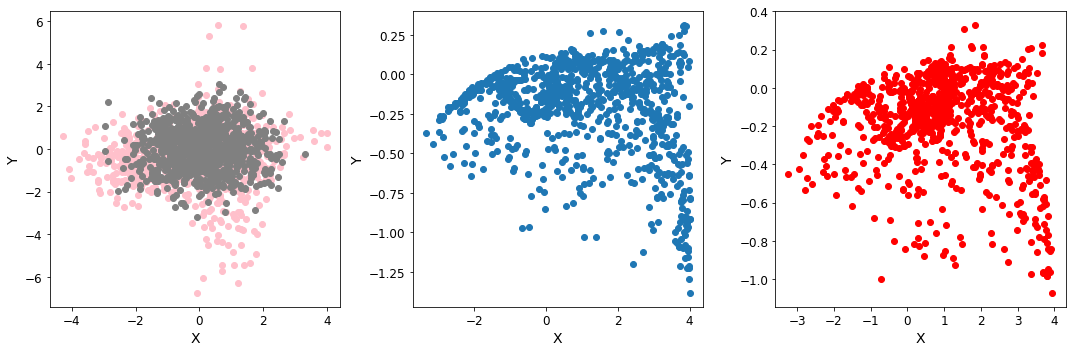

In [10]:
#predict the labels of the data values on the basis of the trained model.
#sampling from the latent space without prediction

latent_values = np.random.normal(loc=0, scale=1, size=([1000, Z]))
predicted_values = aae.decoder(latent_values)

predicted_values2 = aae.decoder(aae.encoder(X_train_scaled))
predicted_values3 = aae.encoder(X_train_scaled)
predicted_values4 = scaler.inverse_transform(X_train_scaled)

if scaled == '-1-1':
    predicted_values = scaler.inverse_transform(predicted_values)
    predicted_values2 = scaler.inverse_transform(predicted_values2)
    #predicted_values3 = scaler.inverse_transform(predicted_values3)
    
elif scaled =='0-1':
    predicted_values = scaler.inverse_transform(predicted_values)
    predicted_values2 = scaler.inverse_transform(predicted_values2)
    


if n_features==3:
    print("Predicted Values:",predicted_values.shape)
    print("latent_space:",Z)
    print("BATCH_SIZE:",BATCH_SIZE)
    print("epochs:",epochs)
    

    ab = plt.subplot(projection='3d')
    ab.scatter(predicted_values[:,0],predicted_values[:,1],predicted_values[:,2])
    ab.set_ylabel('Y')
    ab.set_zlabel('Z')
    ab.set_xlabel('X')
    
    
    print("X-Y 2D slices:")
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    plt.ylim(-1.5,1.5)
    plt.xlim(-1.5,1.5)
    axes[0].scatter(X_train[:,0],X_train[:,1])
    axes[0].scatter(predicted_values[:,0],predicted_values[:,1])
    axes[0].set_xlabel("X")
    axes[0].set_ylabel("Y")
    
    plt.ylim(-1.5,1.5)
    plt.xlim(-2,22)
    axes[1].scatter(X_train[:,1],y_train)
    axes[1].scatter(predicted_values[:,1],predicted_values[:,2])
    axes[1].set_xlabel("Y")
    axes[1].set_ylabel("Z")
    
    plt.xlim(-1.5,1.5)
    plt.ylim(-2,22)
    axes[2].scatter(X_train[:,0],y_train)
    axes[2].scatter(predicted_values[:,0],predicted_values[:,2])
    axes[2].set_xlabel("X")
    axes[2].set_ylabel("Z")
    
    plt.tight_layout()
    

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    
    ac=np.where(np.logical_and(X_train[:,0]>=-0.8-0.05,X_train[:,0]<=-0.8+0.05),X_train[:,1],None)
    ad=np.where(np.logical_and(predicted_values[:,0]>=-0.8-0.05,predicted_values[:,0]<=-0.8+0.05),predicted_values[:,1],None)
    axes[0].scatter(ac,y_train)
    axes[0].scatter(ad,predicted_values[:,2])
    axes[0].set_xlabel("Y(X=-0.8)")
    axes[0].set_ylabel("Y")
    
    ae=np.where(np.logical_and(X_train[:,0]>=0.0-0.05,X_train[:,0]<=0.0+0.05),X_train[:,1],None)
    af=np.where(np.logical_and(predicted_values[:,0]>=0.0-0.05,predicted_values[:,0]<=0.0+0.05),predicted_values[:,1],None)
    axes[1].scatter(ae,y_train)
    axes[1].scatter(af,predicted_values[:,2])
    axes[1].set_xlabel("Y(X=0.0)")
    axes[1].set_ylabel("Z")
    
    ag=np.where(np.logical_and(X_train[:,0]>=0.8-0.05,X_train[:,0]<=0.8+0.05),X_train[:,1],None)
    ah=np.where(np.logical_and(predicted_values[:,0]>=0.8-0.05,predicted_values[:,0]<=0.8+0.05),predicted_values[:,1],None)
    axes[2].scatter(ag,y_train)
    axes[2].scatter(ah,predicted_values[:,2])
    axes[2].set_xlabel("Y(X=0.8)")
    axes[2].set_ylabel("Z")
    
    plt.tight_layout()
    
    
    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    ac=np.where(np.logical_and(X_train[:,1]>=0.2-0.05,X_train[:,1]<=0.2+0.05),X_train[:,0],None)
    ad=np.where(np.logical_and(predicted_values[:,1]>=0.2-0.05,predicted_values[:,1]<=0.2+0.05),predicted_values[:,0],None)
    axes[0].scatter(ac,y_train)
    axes[0].scatter(ad,predicted_values[:,2])
    axes[0].set_xlabel("X(Y=0.2)")
    axes[0].set_ylabel("Z")
    
    ae=np.where(np.logical_and(X_train[:,1]>=0.5-0.05,X_train[:,1]<=0.5+0.05),X_train[:,0],None)
    af=np.where(np.logical_and(predicted_values[:,1]>=0.5-0.05,predicted_values[:,1]<=0.5+0.05),predicted_values[:,0],None)
    axes[1].scatter(ae,y_train)
    axes[1].scatter(af,predicted_values[:,2])
    axes[1].set_xlabel("X(Y=0.5)")
    axes[1].set_ylabel("Z")
    
    ag=np.where(np.logical_and(X_train[:,1]>=0.8-0.05,X_train[:,1]<=0.8+0.05),X_train[:,0],None)
    ah=np.where(np.logical_and(predicted_values[:,1]>=0.8-0.05,predicted_values[:,1]<=0.8+0.05),predicted_values[:,0],None)
    axes[2].scatter(ag,y_train)
    axes[2].scatter(ah,predicted_values[:,2])
    axes[2].set_xlabel("X(Y=0.8)")
    axes[2].set_ylabel("Z")
    
    
    plt.tight_layout()
    
    
else:
    print("Predicted Values:",predicted_values.shape)
    #plt.scatter(X_train, y_train,c='orange') #sample
    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)

    axes[0].scatter(predicted_values3[:,0],predicted_values3[:,1],c='pink')#encoder(X_train_scaled)
    axes[0].scatter(latent_values[:,0],latent_values[:,1],c='grey')
    axes[0].set_ylabel('Y')
    axes[0].set_xlabel('X')

    
    
    axes[1].scatter(predicted_values2[:,0],predicted_values2[:,1],)#encoder/decoder
    #axes[1].scatter(predicted_values4[:,0],predicted_values4[:,1],c='grey')#X_trained_scaled
    axes[1].set_ylabel('Y')
    axes[1].set_xlabel('X')

    
    axes[2].scatter(predicted_values[:,0],predicted_values[:,1],c='red') #decoder(latent space)
    #axes[2].scatter(predicted_values4[:,0],predicted_values4[:,1],c='grey')#X_trained_scaled
    axes[2].set_ylabel('Y')
    axes[2].set_xlabel('X')
    
    plt.tight_layout()




### Applying the prediction function

input_test : (900, 2)


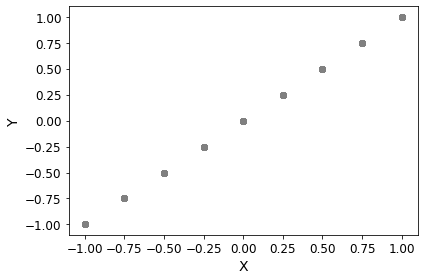

In [11]:
# define these for desired prediction
x_input = [-4,-3,-2,-1,0,1,2,3,4]
n_points = 900
y_min = -1
y_max = 1

# produces an input of fixed x coordinates with random y values
predict1 = np.full((n_points//9, n_features), x_input[0])
predict2 = np.full((n_points//9, n_features), x_input[1])
predict3 = np.full((n_points//9, n_features), x_input[2])
predict4 = np.full((n_points//9, n_features), x_input[3])
predict5 = np.full((n_points//9, n_features), x_input[4])
predict6 = np.full((n_points//9, n_features), x_input[5])
predict7 = np.full((n_points//9, n_features), x_input[6])
predict8 = np.full((n_points//9, n_features), x_input[7])
predict9 = np.full((n_points//9, n_features), x_input[8])

predictthis = np.concatenate((predict1, predict2, predict3, predict4, predict5, predict6, predict7, predict8, predict9))
predictthis = scaler.fit_transform(predictthis)
input_test = predictthis.reshape(n_points, n_features).astype('float32')


print("input_test :",input_test.shape)
plt.scatter(input_test[:,0],input_test[:,1] ,c='grey')
plt.ylabel('Y')
plt.xlabel('X')
plt.tight_layout()
    

In [12]:
#X_generated = aae.generator.predict(input_test)
X_generated = aae.decoder(aae.encoder.predict(input_test))
X_generated = scaler.inverse_transform(X_generated)
print("X_generated :",X_generated.shape)

X_generated : (900, 2)


Generated Data: (900, 2)


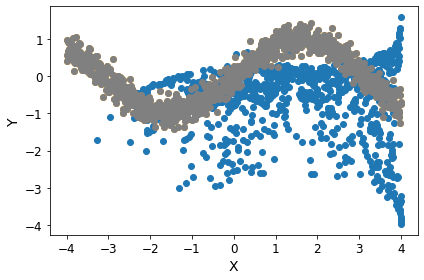

In [13]:
if scenario in ("3d", "helix"):
    print("latent_space=",latent_space)
    print("Epochs=",epochs)
    print("BATCH_SIZE=",BATCH_SIZE)
    print("use_bias=",use_bias)
    
    ax = plt.subplot(projection='3d')
    ax.scatter(X_generated[:,0], X_generated[:,1], X_generated[:,2], label='Generated Data')


    ax.set_zlabel('Z')
    ax.set_ylabel('Y')
    ax.set_xlabel('X')

    plt.legend(loc='best')
    plt.tight_layout()
    
    print("X-Y 2D slices:")
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    plt.ylim(-1.5,1.5)
    plt.xlim(-1.5,1.5)
    axes[0].scatter(X_train[:,0],X_train[:,1])
    axes[0].scatter(X_generated[:,0],X_generated[:,1])
    axes[0].set_xlabel("X")
    axes[0].set_ylabel("Y")
    
    plt.ylim(-1.5,1.5)
    plt.xlim(-2,22)
    axes[1].scatter(X_train[:,1],y_train)
    axes[1].scatter(X_generated[:,1],X_generated[:,2])
    axes[1].set_xlabel("Y")
    axes[1].set_ylabel("Z")
    
    plt.xlim(-1.5,1.5)
    plt.ylim(-2,22)
    axes[2].scatter(X_train[:,0],y_train)
    axes[2].scatter(X_generated[:,0],X_generated[:,2])
    axes[2].set_xlabel("X")
    axes[2].set_ylabel("Z")
    
    plt.tight_layout()
    

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    
    ac=np.where(np.logical_and(X_train[:,0]>=-0.8-0.05,X_train[:,0]<=-0.8+0.05),X_train[:,1],None)
    ad=np.where(np.logical_and(X_generated[:,0]>=-0.8-0.05,X_generated[:,0]<=-0.8+0.05),X_generated[:,1],None)
    axes[0].scatter(ac,y_train)
    axes[0].scatter(ad,X_generated[:,2])
    axes[0].set_xlabel("Y(X=-0.8)")
    axes[0].set_ylabel("Y")
    
    ae=np.where(np.logical_and(X_train[:,0]>=0.0-0.05,X_train[:,0]<=0.0+0.05),X_train[:,1],None)
    af=np.where(np.logical_and(X_generated[:,0]>=0.0-0.05,X_generated[:,0]<=0.0+0.05),X_generated[:,1],None)
    axes[1].scatter(ae,y_train)
    axes[1].scatter(af,X_generated[:,2])
    axes[1].set_xlabel("Y(X=0.0)")
    axes[1].set_ylabel("Z")
    
    ag=np.where(np.logical_and(X_train[:,0]>=0.8-0.05,X_train[:,0]<=0.8+0.05),X_train[:,1],None)
    ah=np.where(np.logical_and(X_generated[:,0]>=0.8-0.05,X_generated[:,0]<=0.8+0.05),X_generated[:,1],None)
    axes[2].scatter(ag,y_train)
    axes[2].scatter(ah,X_generated[:,2])
    axes[2].set_xlabel("Y(X=0.8)")
    axes[2].set_ylabel("Z")
    
    plt.tight_layout()
    
    
    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    ac=np.where(np.logical_and(X_train[:,1]>=0.2-0.05,X_train[:,1]<=0.2+0.05),X_train[:,0],None)
    ad=np.where(np.logical_and(X_generated[:,1]>=0.2-0.05,X_generated[:,1]<=0.2+0.05),X_generated[:,0],None)
    axes[0].scatter(ac,y_train)
    axes[0].scatter(ad,X_generated[:,2])
    axes[0].set_xlabel("X(Y=0.2)")
    axes[0].set_ylabel("Z")
    
    ae=np.where(np.logical_and(X_train[:,1]>=0.5-0.05,X_train[:,1]<=0.5+0.05),X_train[:,0],None)
    af=np.where(np.logical_and(X_generated[:,1]>=0.5-0.05,X_generated[:,1]<=0.5+0.05),X_generated[:,0],None)
    axes[1].scatter(ae,y_train)
    axes[1].scatter(af,X_generated[:,2])
    axes[1].set_xlabel("X(Y=0.5)")
    axes[1].set_ylabel("Z")
    
    ag=np.where(np.logical_and(X_train[:,1]>=0.8-0.05,X_train[:,1]<=0.8+0.05),X_train[:,0],None)
    ah=np.where(np.logical_and(X_generated[:,1]>=0.8-0.05,X_generated[:,1]<=0.8+0.05),X_generated[:,0],None)
    axes[2].scatter(ag,y_train)
    axes[2].scatter(ah,X_generated[:,2])
    axes[2].set_xlabel("X(Y=0.8)")
    axes[2].set_ylabel("Z")
    
    
    plt.tight_layout()
    
    
else:
    print("Generated Data:",X_generated.shape)
    plt.scatter(X_train, y_train,c='orange') 
    plt.scatter(X_generated[:,0],X_generated[:,1])
    plt.scatter(predicted_values4[:,0],predicted_values4[:,1],c='grey')#X_trained_scaled
    #plt.scatter(predicted_values2[:,0],predicted_values2[:,1])
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.tight_layout()
    